In [1]:
import typing

import torch
import matplotlib.pyplot as plt
import omegaconf

from ellipses_datamodule import EllipsesDataModule

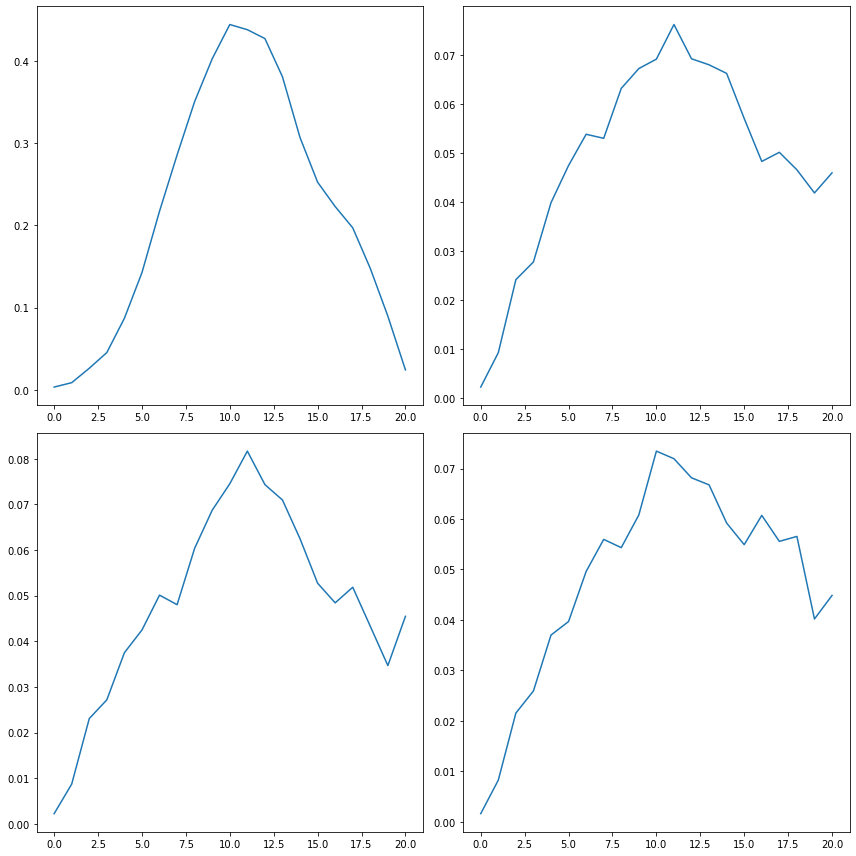

In [2]:
coefficients = torch.load("runs/_debug/coefficients.pt").detach().to("cpu")
plt.subplots(2,2,figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(torch.arange(0, coefficients.shape[1]), coefficients[i])
plt.tight_layout()
plt.show()

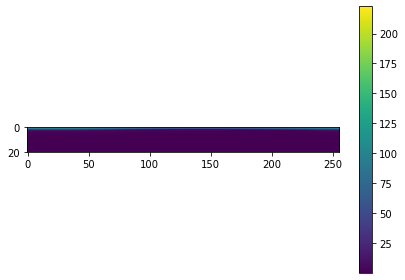

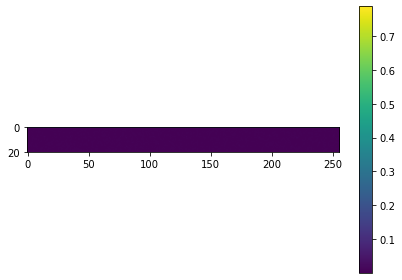

In [3]:
pi = torch.load("runs/_debug/pi.pt").detach().to("cpu").mT
plt.figure()
plt.imshow(pi.abs())
plt.colorbar()
plt.tight_layout()
plt.show()

delta = torch.load("runs/_debug/delta.pt").detach().to("cpu").mT
plt.figure()
plt.imshow(delta.abs())
plt.colorbar()
plt.tight_layout()
plt.show()

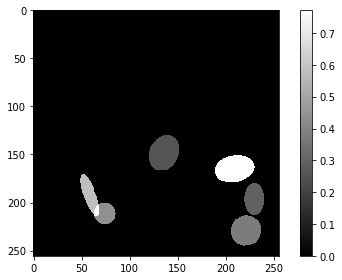

In [24]:
edmi = iter(EllipsesDataModule(typing.cast(omegaconf.DictConfig, type("FakeDictConfig", (object,), {
    "training_batch_count": 100,
    "training_batch_size": 32,
    "drop_last_training_batch": True,
    "shuffle_training_data": True,
    "num_workers": 0,
    "dataset": typing.cast(omegaconf.DictConfig, type("FakeDictConfig", (object,), {
        "name": "ellipses",
        "img_size": 256,
        "ellipse_count": 10,
        "ellipse_size": 50,
        "ellipse_size_min": 10
    })),
}))).train_dataloader())
plt.figure()
plt.imshow(next(edmi)[0][0,0], interpolation="nearest", cmap="gray")
plt.colorbar()
plt.tight_layout()
plt.show()